In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score

In [4]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
from sklearn.utils import shuffle


pd.set_option('display.max_columns', None)

### Baseline logistic regression 

In [5]:
df = pd.read_csv('../2_Preprocessed_Data/dataset_1999_2022.csv')

In [15]:
df_LR = df[['Original Loan-to-Value (LTV)', 'Original Debt-to-Income (DTI) Ratio', 'Credit Score', 'Delinquent']]
df_LR = df_LR.dropna()
df_LR


Original Loan-to-Value (LTV)  Original Debt-to-Income (DTI) Ratio  \
0                               50.0                                 42.0   
1                               74.0                                 20.0   
2                               80.0                                 28.0   
3                               80.0                                 32.0   
4                               36.0                                 47.0   
...                              ...                                  ...   
205561                          78.0                                 37.0   
205562                          74.0                                 56.0   
205563                          79.0                                 49.0   
205564                          48.0                                 22.0   
205565                          80.0                                 37.0   

        Credit Score  Delinquent  
0              755.0        True  
1              709.0        True  
2              776.0       False  
3              687.0        True  
4              662.0       False  
...              ...         ...  
205561         685.0        True  
205562         802.0       False  
205563         633.0        True  
205564         775.0       False  
205565         791.0       False  

[205566 rows x 4 columns]

In [7]:
labels = pd.DataFrame(df_LR['Delinquent'])
x = pd.DataFrame(df_LR[['Original Loan-to-Value (LTV)', 'Original Debt-to-Income (DTI) Ratio', 'Credit Score']])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size=0.3, random_state=42)


In [10]:
X_train.head(2)

Original Loan-to-Value (LTV)  Original Debt-to-Income (DTI) Ratio  \
77220                           95.0                                 54.0   
165887                          95.0                                 43.0   

        Credit Score  
77220          682.0  
165887         656.0

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)


c:\Users\mot99\anaconda3\envs\wl\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept: [8.67029956]
Coefficients: [[ 0.0061133   0.01900411 -0.01346875]]


In [12]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.6623317658504946

In [13]:
print('accuracy : ',accuracy_score(y_test,y_pred ))
print('f1 score : ', f1_score(y_test,y_pred))
print('precision : ', precision_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))

accuracy :  0.6623317658504946
f1 score :  0.6549347120037119
precision :  0.6676576911382142
recall :  0.642687567075352


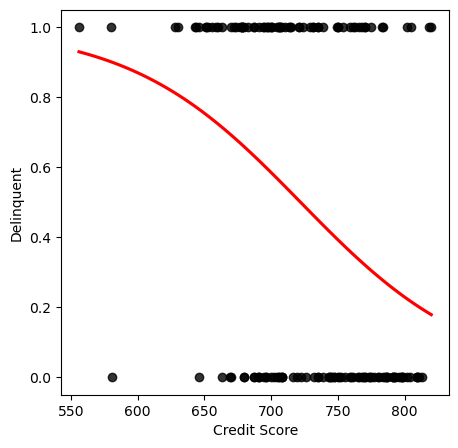

In [29]:
import random
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,figsize=(5, 5))
# plot

random.seed(42)
subset = random.sample(list(X_train.index), 150)# total 205566
sns.regplot(x=df_LR.loc[subset]['Credit Score'], y = df_LR.loc[subset]['Delinquent'],ci = False, logistic=True, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax = ax)
fig.savefig('log_reg.png', dpi=500)


###  Logistic regression with more features (without categorical)

In [12]:
df = pd.read_csv('../2_Preprocessed_Data/dataset_1999_2022.csv')

In [13]:
X = df.drop(columns = ['Delinquent', 'First Payment Date', 'Occupancy Status', 'Postal Code', 'Channel', 'Property State', 'Property Type', 'Loan Purpose'])
Y = df['Delinquent']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



In [14]:
X_train.head(2)

Unnamed: 0  Credit Score  First Time Homebuyer Flag  Number of Units  \
77220       111497         682.0                          0                0   
165887      239758         656.0                          0                0   

        Original Debt-to-Income (DTI) Ratio  Original Loan-to-Value (LTV)  \
77220                                  54.0                          95.0   
165887                                 43.0                          95.0   

        Original Loan Term  Number of Borrowers  First Payment Year  
77220                  360                    1                2005  
165887                 360                    0                2017

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)


Intercept: [2.76295199e-06]
Coefficients: [[ 7.21779708e-09 -1.41174270e-02 -5.90296241e-06  7.50545811e-06
   1.98747271e-03  1.65470298e-03  1.56900420e-03 -8.77511284e-05
   4.75096135e-03]]


In [16]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)


0.6560564293821955

In [17]:
print('accuracy : ',accuracy_score(y_test,y_pred ))
print('f1 score : ', f1_score(y_test,y_pred))
print('precision : ', precision_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))



accuracy :  0.6560564293821955
f1 score :  0.6457571354610285
precision :  0.6287358938502066
recall :  0.6637256248283439
accuracy :  0.6560564293821955
f1 score :  0.6457571354610285
precision :  0.6637256248283439
recall :  0.6287358938502066


###  Logistic regression with all features 

In [18]:
df = pd.read_csv('../2_Preprocessed_Data/encod_dataset_1999_2022.csv')

In [19]:
df.head(2)

Unnamed: 0  Delinquent  Credit Score First Payment Date  \
0           0        True         755.0         2015-12-01   
1           1        True         709.0         2012-11-01   

   First Time Homebuyer Flag  Number of Units  \
0                          1                0   
1                          0                0   

   Original Debt-to-Income (DTI) Ratio  Original Loan-to-Value (LTV)  \
0                                 42.0                          50.0   
1                                 20.0                          74.0   

   Postal Code  Original Loan Term  Number of Borrowers  First Payment Year  \
0        95300                 360                    1                2015   
1        42100                 240                    0                2012   

   Occupancy Status_P  Occupancy Status_S  Channel_B  Channel_C  Channel_R  \
0                   1                   0          0          0          1   
1                   1                   0          0          1          0   

   Channel_T  Property State_AL  Property State_AR  Property State_AZ  \
0          0                  0                  0                  0   
1          0                  0                  0                  0   

   Property State_CA  Property State_CO  Property State_CT  Property State_DC  \
0                  1                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_DE  Property State_FL  Property State_GA  Property State_HI  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_IA  Property State_ID  Property State_IL  Property State_IN  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_KS  Property State_KY  Property State_LA  Property State_MA  \
0                  0                  0                  0                  0   
1                  0                  1                  0                  0   

   Property State_MD  Property State_ME  Property State_MI  Property State_MN  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_MO  Property State_MS  Property State_MT  Property State_NC  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_ND  Property State_NE  Property State_NH  Property State_NJ  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_NM  Property State_NV  Property State_NY  Property State_OH  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_OK  Property State_OR  Property State_PA  Property State_PR  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_RI  Property State_SC  Property State_SD  Property State_TN  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_TX  Property State_UT  Property State_VA  Property State_VT  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   Property State_WA  Property State_WI  Property State_WV  Property State

In [20]:
X = df.drop(columns = ['Delinquent', 'First Payment Date', 'Postal Code'])
Y = df['Delinquent']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [21]:
X_train.head(2)

Unnamed: 0  Credit Score  First Time Homebuyer Flag  Number of Units  \
77220       111497         682.0                          0                0   
165887      239758         656.0                          0                0   

        Original Debt-to-Income (DTI) Ratio  Original Loan-to-Value (LTV)  \
77220                                  54.0                          95.0   
165887                                 43.0                          95.0   

        Original Loan Term  Number of Borrowers  First Payment Year  \
77220                  360                    1                2005   
165887                 360                    0                2017   

        Occupancy Status_P  Occupancy Status_S  Channel_B  Channel_C  \
77220                    1                   0          0          0   
165887                   1                   0          0          0   

        Channel_R  Channel_T  Property State_AL  Property State_AR  \
77220           0          1                  0                  0   
165887          1          0                  0                  0   

        Property State_AZ  Property State_CA  Property State_CO  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_CT  Property State_DC  Property State_DE  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_FL  Property State_GA  Property State_HI  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_IA  Property State_ID  Property State_IL  \
77220                   0                  0                  1   
165887                  0                  0                  0   

        Property State_IN  Property State_KS  Property State_KY  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_LA  Property State_MA  Property State_MD  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_ME  Property State_MI  Property State_MN  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_MO  Property State_MS  Property State_MT  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_NC  Property State_ND  Property State_NE  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_NH  Property State_NJ  Property State_NM  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_NV  Property State_NY  Property State_OH  \
77220                   0                  0                  0   
165887                  0                  1                  0   

        Property State_OK  Property State_OR  Property State_PA  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_PR  Property State_RI  Property State_SC  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_SD  Property State_TN  Property State_TX  \
77220                   0                  0                  0   
165887                  0                  0                  0   

        Property State_UT  Property State_VA  Property State_VT  

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)


Intercept: [2.76302e-06]
Coefficients: [[ 7.22187331e-09 -1.41176096e-02 -5.90321569e-06  7.50590781e-06
   1.98756788e-03  1.65475639e-03  1.56857667e-03 -8.77575391e-05
   4.75110316e-03 -1.20741841e-05  6.39660747e-07 -6.74143385e-06
  -2.48905305e-05 -4.42789212e-05  7.86525548e-05  1.62158687e-06
  -2.96937899e-07  6.63628602e-07 -8.96602392e-06 -5.89391326e-06
   1.02646039e-06 -9.08239150e-08  2.60597141e-07  2.50916347e-05
   5.51911300e-06 -4.70219386e-07 -1.97212662e-06 -4.17011079e-07
  -1.40617705e-06 -1.57680784e-06 -1.50576998e-06 -2.08040808e-06
   3.11648464e-06 -2.18959637e-06 -6.80571058e-07 -5.27316469e-07
   6.98242705e-07 -3.17951354e-06 -2.07938252e-06  7.71782104e-07
  -2.60179810e-07 -1.99316864e-06 -7.17667251e-07 -1.43214291e-06
   3.74431577e-08  4.34051973e-06  7.07190573e-07  2.35899360e-06
   1.08741341e-05 -1.53144941e-06 -2.73866571e-07 -2.20881500e-06
  -1.01633083e-06  7.35593766e-07  4.34444730e-07  4.70599396e-07
  -1.31156819e-07 -1.76159233e-07  4.

In [23]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)


0.6560888600616183

In [24]:
print('accuracy : ',accuracy_score(y_test,y_pred ))
print('f1 score : ', f1_score(y_test,y_pred))
print('precision : ', precision_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))



accuracy :  0.6560888600616183
f1 score :  0.6457787056367432
precision :  0.6637712009888073
recall :  0.6287358938502066
